# I.1 Gauss Function

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from math import *
import scipy as sp
from scipy.stats import norm

data = np.linspace(-5,4,100)
def gaussian(x):
    sigma = 2
    mu = -1
    a = (2*3.14*(sigma**2))**(1/2)
    b = ((x-mu)**2)/(2*sigma**2)
    value = (1/a)*(e**(-b))
    return value

answer = gaussian(data)

# I.2 Scipy.stats

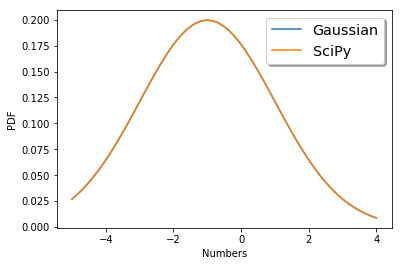

In [3]:
answer2 = norm.pdf(data,-1,2)

fig,ax = plt.subplots()
ax.plot(data,answer,label='Gaussian')
ax.plot(data,answer2,label='SciPy')
ax.set(xlabel='Numbers',ylabel='PDF');
ax.legend(loc='upper right', shadow=True, fontsize='x-large');

# I.3 Statistical measures

In [4]:
mean = sp.mean(data)
print('Mean =',mean)
median = sp.median(data)
print('Median =',median)
variance = sp.var(data)
print('Variance =',variance)
standard_deviation = sp.std(data)
print('Standard deviation =',standard_deviation)

Mean = -0.5
Median = -0.49999999999999956
Variance = 6.886363636363637
Standard deviation = 2.624188186156556


# II.1 Discrete Distribution

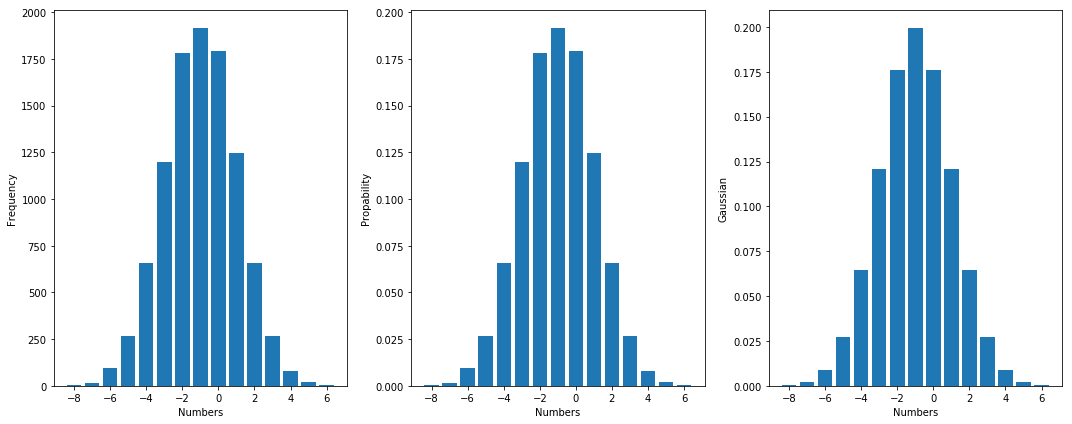

In [5]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

RN = np.random.normal(-1,2,size=10000)
RN_int = np.int64(np.round(RN))

b=sp.stats.itemfreq(RN_int)
values = b[:,0] 
frequency= b[:,1]
propability1 = frequency/(frequency.sum())
# II.2 Self implemented gauss function
G_propability=gaussian(values)

fig,ax = plt.subplots(ncols=3,figsize=(15,6))
ax[0].bar(values,frequency);
ax[0].set(xlabel='Numbers',ylabel='Frequency');
ax[1].bar(values,propability1);  
ax[1].set(xlabel='Numbers',ylabel='Propability');
ax[2].bar(values,G_propability);
ax[2].set(xlabel='Numbers',ylabel='Gaussian');
fig.tight_layout()

# III.Convergence Study

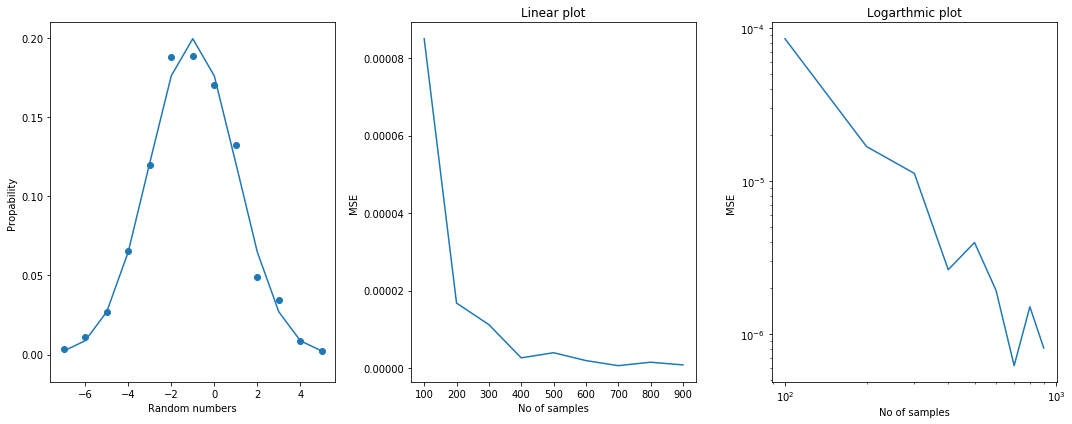

In [6]:
sample=np.arange(100,1000,100)
Mean_sq=[]
for i in sample:
    CD = np.round(np.random.normal(-1,2,size=i))
    c = sp.stats.itemfreq(CD)
    val1 = c[:,0]
    Frequency1 = c[:,1]
    Propability1 = Frequency1/Frequency1.sum()
    GS = gaussian(val1)

    Diff = Propability1 - GS
    Sum=np.sum(np.square(Diff))
    MSE = Sum/i
    Mean_sq.append(MSE)

fig,ax = plt.subplots(ncols=3,figsize=(15,6))
ax[0].scatter(val1,Propability1);
ax[0].plot(val1,GS);
ax[0].set(xlabel='Random numbers',ylabel='Propability')
ax[1].plot(sample,Mean_sq)
ax[1].set(xlabel='No of samples',ylabel='MSE',title='Linear plot')
ax[2].loglog(sample,Mean_sq)
ax[2].set(xlabel='No of samples',ylabel='MSE',title='Logarthmic plot')
fig.tight_layout()

A straight line in the loglog plot represents a good convergence behaviour, because a definite power relationship exists between the No of samples and the mean square error. 